In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd


# Part 1 ~ College admittance decision
Logistic regression with gradient decent 

In [37]:
# ~ A ~ #
Xdata = pd.read_csv("data\\admittance_data.csv")
data = Xdata.to_numpy()
X_orig = data[:,0:2]
y = data[:,2]
m = y.size

X_orig is the feature matrix - each row represents one student grades

y - the corresponding label ---> 1- admitted, 0 - not admitted

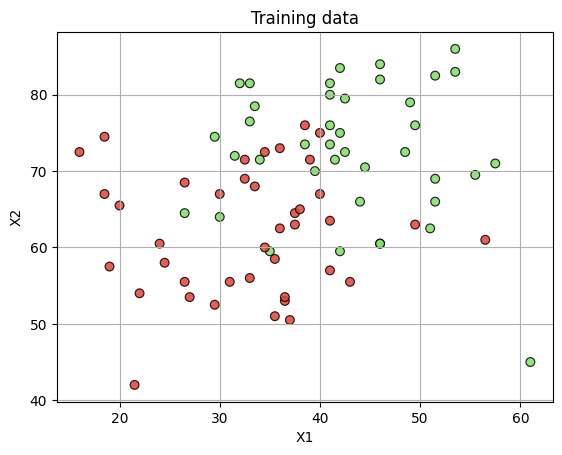

In [38]:
# ~ B ~ #
x1 = X_orig[:,0]
x2 = X_orig[:,1]

colors = ['#e34234' if yi==0 else '#80df66' for yi in y]
plt.scatter(x1, x2, c=colors, s=40, edgecolors='k', linewidths=0.85, alpha=0.85)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')
plt.grid(True)
plt.show()

In [ ]:
# ~ C ~ #
def sigmoid(z):
    """ Compute sigmoid function """
    return 1 / (1 + np.exp(-z))


def compute_cost(X, y, theta):
    """ Compute cost for logistic regression """
    y = y.reshape(-1, 1)  # Ensure y is a column vector
    m = y.size
    
    grad_J = np.zeros(theta.shape)
    z = np.dot(X, theta)
    h_theta = sigmoid(z)
    
    J = (- 1 / m) * (np.dot(y.T, np.log(h_theta)) + np.dot((1 - y).T, np.log(1 - h_theta)))
    grad_J = 1 / m * np.dot(X.T, (h_theta - y))
    return J, grad_J


def gradient_descent(X, y, theta, alpha, num_iters, plot_flag=False):
    """ Perform gradient descent to learn theta """
    J_iter = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        cost, grad = compute_cost(X, y, theta)
        J_iter[iter] = cost.item()
        theta = theta - alpha * grad
        
    if plot_flag:
        plt.plot(J_iter), plt.show()
    return theta, J_iter


def plot_reglog_line(X, y, theta):
    """
    plot_reg_line plots the data points and regression line for logistic regression
    Input arguments: X - np array (m, n) - independent variable.
    y - np array (m,1) - target variable
    theta - parameters
    The function is for 2-d input - x2 = -(theta[0] + theta[1]*x1)/theta[2]
    """
    ind = 1
    x1_min = 1.1 * X[:, ind].min()
    x1_max = 1.1 * X[:, ind].max()
    # ind_min = X[:,ind].argmin()
    # ind_max = X[:,ind].argmax()
    x2_min = -(theta[0] + theta[1] * x1_min) / theta[2]
    x2_max = -(theta[0] + theta[1] * x1_max) / theta[2]
    x1 = X
    x1lh = np.array([x1_min, x1_max])
    x2lh = np.array([x2_min, x2_max])

    x1 = X[:, 1]
    x2 = X[:, 2]
    plt.plot(x1[y[:, 0] == 0], x2[y[:, 0] == 0], 'ro', x1[y[:, 0] == 1], x2[y[:, 0] == 1],
             'go', x1lh, x2lh, 'b-')
    # plt.axis((x_min-5, x_max+5, min(y_min,y_max) - 5 , max(y_min,y_max)+5))
    plt.xlabel('x1'), plt.ylabel('x2')
    plt.title('data')
    plt.grid()
    plt.show()

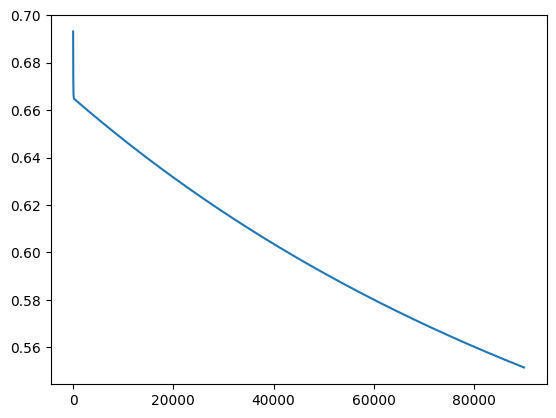

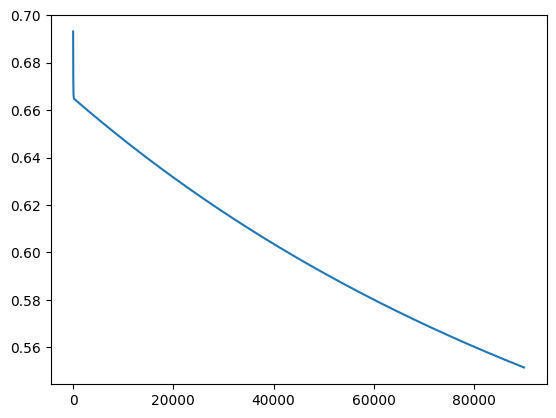

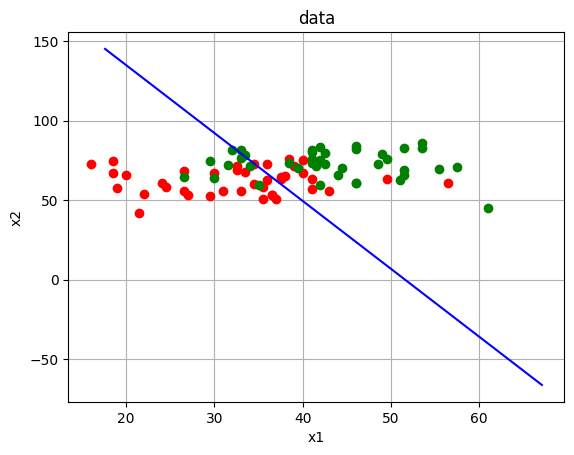

In [41]:
# ~ D ~ #
onesvec = np.ones((m ,1))
X = np.concatenate((onesvec, X_orig), axis = 1)
n = X.shape[1]
theta = np.zeros((n,1))
y = y.reshape([y.shape[0], 1])
J, grad_J = compute_cost(X, y, theta)
alpha = 0.001
num_iters = 90000
theta, J_iter =  gradient_descent(X, y, theta, alpha, num_iters)
plt.plot(J_iter)
plt.show()
plot_reglog_line(X, y, theta)
